In [91]:
import tensorflow as tf

In [92]:
import pandas as pd
import numpy as np

In [93]:
df_bon=pd.read_csv('true.csv')
df_mauvais=pd.read_csv('false.csv')
df_mitm=pd.read_csv('mitm.csv')
df_mitm=df_mitm.drop(columns=['snow','erreur_m'],axis=1)
df_mauvais=df_mauvais.drop(columns=['snow','erreur_m'],axis=1)
df_bon=df_bon.drop(columns=['erreur_m','snow'],axis=1)


In [94]:
df_mauvais['is_attack'] = df_mauvais["is_attack"].replace(1, 0)

In [95]:
df_mitm['is_attack'] = df_mitm["is_attack"].replace(1, 0)

In [96]:
df_merge = pd.concat([df_bon, df_mauvais,df_mitm], ignore_index=True)

In [97]:
df_merge.shape
df_merge.describe()


,mission_id,time,real_x,real_y,real_z,vx,vy,vz,ax,ay,...,roll,pitch,yaw,wind_x,wind_y,wind_z,velocity,rain,fog,is_attack
count,20013.00000,2.001300e+04,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,...,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000
mean,387.06086,1.683092e+09,19.426888,0.949971,-2.007558,0.267386,0.091779,0.167019,-0.048132,-0.375495,...,-0.010073,-0.016622,-0.302996,2.962866,1.943077,1.133560,10.926407,0.103314,0.105360,0.351522
std,375.19615,3.286497e+08,17.672038,3.703543,5.105496,1.957179,1.058654,0.574453,0.161958,1.854444,...,0.121419,0.454256,2.413537,0.327705,0.385946,4.477163,37.857697,0.061038,0.070711,0.477457
min,1.00000,-5.240803e+00,-12.084674,-14.119663,-36.765549,-9.472232,-6.753105,-3.782800,-7.257311,-11.851079,...,-0.813920,-3.131726,-3.141575,1.500462,0.400274,0.060624,0.089348,0.000000,0.000000,0.000000
25%,127.00000,1.747218e+09,2.732204,-1.000000,-5.000000,-0.119004,-0.168301,-0.011168,-0.078565,-0.061164,...,-0.046244,-0.015902,-2.727497,2.768064,1.761929,0.452697,4.760000,0.051000,0.049000,0.000000
50%,264.00000,1.747657e+09,17.933540,0.504679,-4.950729,0.187824,0.006117,0.017170,-0.028894,-0.016753,...,-0.000094,0.000045,-0.895398,2.984396,1.981801,0.503805,6.160000,0.100000,0.103000,0.000000
75%,501.00000,1.747839e+09,33.942932,3.214447,0.000000,0.606401,0.360818,0.685627,0.017198,0.024465,...,0.005737,0.013852,2.510269,3.190712,2.192285,0.555027,8.010000,0.150000,0.154000,1.000000
max,1574.00000,1.748023e+09,70.182037,18.104100,19.517063,9.613590,7.168319,15.107558,0.372367,9.114528,...,0.959177,3.138979,3.498398,3.499988,2.499987,150.911467,711.678817,0.380000,0.492000,1.000000


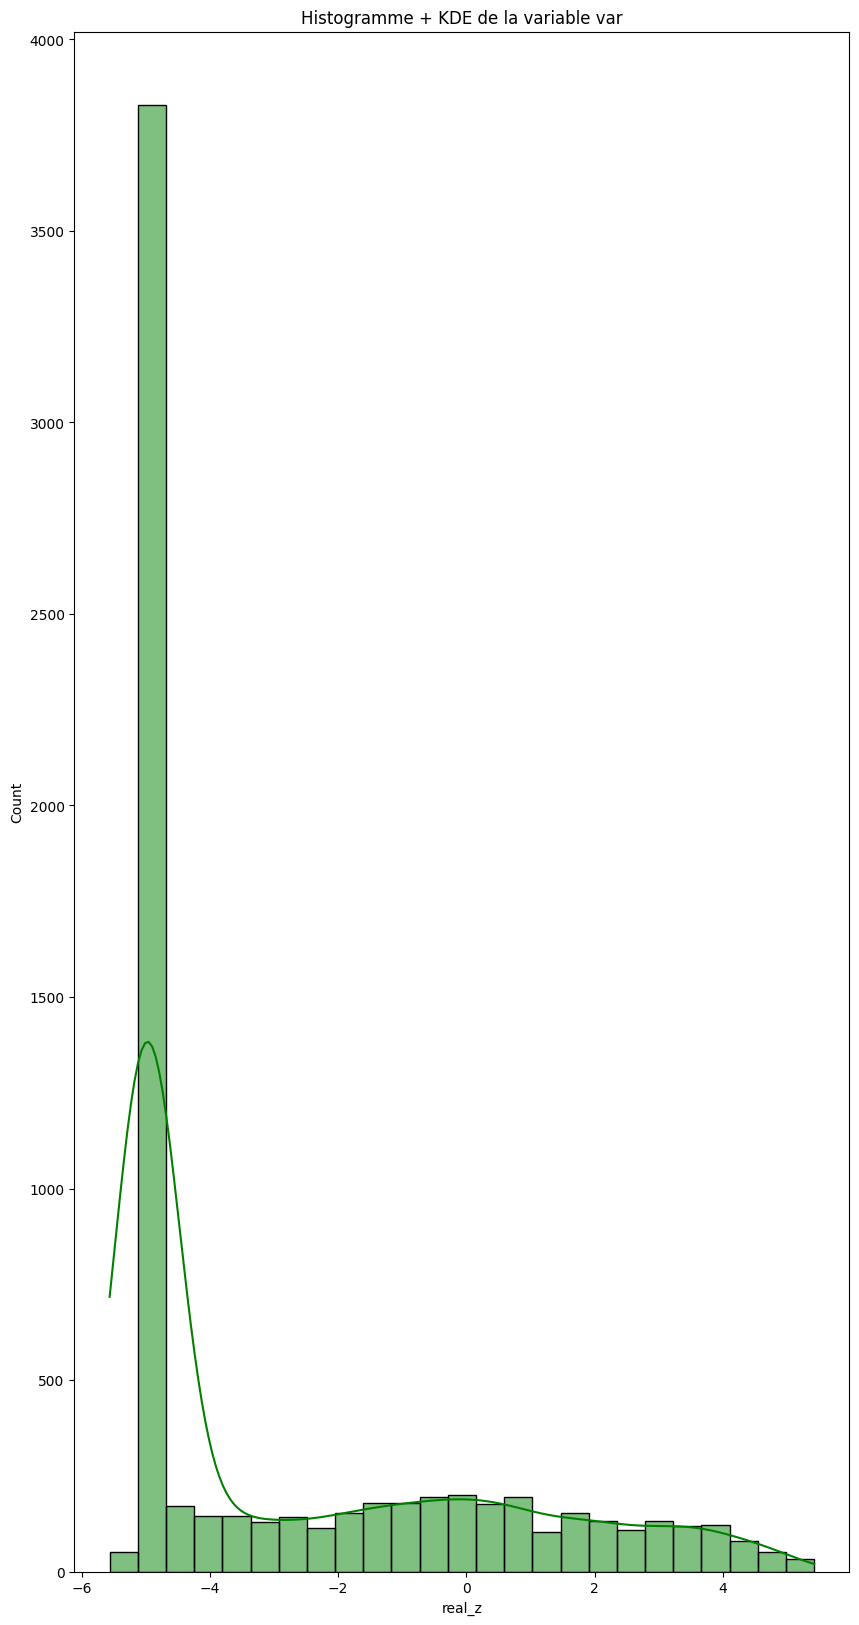

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,20))
sns.histplot(df_bon['real_z'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [99]:
seuil = 0
mediane = df_merge['vx'].median()

df_merge.loc[df_merge['vx'] ==seuil, 'vx'] = mediane

In [100]:
seuil = 0
mediane = df_merge['vy'].median()

df_merge.loc[df_merge['vy'] ==seuil, 'vy'] = mediane

In [101]:
seuil = 0
mediane = df_merge['vz'].median()

df_merge.loc[df_merge['vz'] ==seuil, 'vz'] = mediane

In [102]:
pourcentage = df_merge['is_attack'].value_counts(normalize=True) * 100
print(pourcentage)

is_attack
0.0    64.847849
1.0    35.152151
Name: proportion, dtype: float64


In [103]:
df_merge.shape

(20013, 21)

In [104]:
X=df_merge.drop(columns=['is_attack'],axis=1)
Y=df_merge['is_attack']

In [105]:
nan_percent = X.isna().mean() * 100
print(nan_percent)

mission_id    0.0
time          0.0
real_x        0.0
real_y        0.0
real_z        0.0
vx            0.0
vy            0.0
vz            0.0
ax            0.0
ay            0.0
az            0.0
roll          0.0
pitch         0.0
yaw           0.0
wind_x        0.0
wind_y        0.0
wind_z        0.0
velocity      0.0
rain          0.0
fog           0.0
dtype: float64


In [106]:
from sklearn.feature_selection import f_classif
import pandas as pd

 # binaire ou catégorielle

 #F, p = f_classif(X, Y)

#for i, col in enumerate(X.columns):
    #print(f"{col} → F-score : {F[i]:.2f}, p-value : {p[i]:.4f}")

In [107]:
from scipy.stats import pointbiserialr

for col in X.columns:
    corr, pval = pointbiserialr(X[col], Y)
    print(f"{col} → Corrélation point biserial : {corr:.4f}, p-value : {pval:.4f}")

mission_id → Corrélation point biserial : 0.5164, p-value : 0.0000
time → Corrélation point biserial : 0.1435, p-value : 0.0000
real_x → Corrélation point biserial : 0.1699, p-value : 0.0000
real_y → Corrélation point biserial : -0.1519, p-value : 0.0000
real_z → Corrélation point biserial : -0.1178, p-value : 0.0000
vx → Corrélation point biserial : -0.0025, p-value : 0.7231
vy → Corrélation point biserial : -0.0322, p-value : 0.0000
vz → Corrélation point biserial : 0.1006, p-value : 0.0000
ax → Corrélation point biserial : 0.0686, p-value : 0.0000
ay → Corrélation point biserial : 0.1435, p-value : 0.0000
az → Corrélation point biserial : -0.1003, p-value : 0.0000
roll → Corrélation point biserial : -0.0872, p-value : 0.0000
pitch → Corrélation point biserial : 0.0279, p-value : 0.0001
yaw → Corrélation point biserial : -0.0533, p-value : 0.0000
wind_x → Corrélation point biserial : 0.0841, p-value : 0.0000
wind_y → Corrélation point biserial : 0.1074, p-value : 0.0000
wind_z → Corr

In [108]:
#X=X.drop(columns=['vx','roll'])

In [109]:
from tensorflow.keras.layers import Layer, ReLU

class ScaledReLU(Layer):
    def __init__(self, name_prefix, **kwargs):
        super(ScaledReLU, self).__init__(**kwargs)
        self.name_prefix = name_prefix
        self.relu = ReLU()

    def build(self, input_shape):
        self.a = self.add_weight(name=f"{self.name_prefix}_a",
                                 shape=(),
                                 initializer="ones",
                                 trainable=True)

    def call(self, inputs):
        return self.a * self.relu(inputs)

IMPLEMENTATION D'UN RESEAUX DE NEURONES RECURRENTS

In [110]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model

# Hypothèses
timesteps = 21         # 21 étapes temporelles
features_per_step = 20 # Nombre de features à chaque step (ex: accéléro, gyro...)


features_input = Input(shape=(timesteps, features_per_step), name='X')

# Initialisation de l'activation h0 = 0 (batch_size, 1)
activation = Lambda(lambda x: tf.zeros_like(x[:, :1,0]))(features_input)
a = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32, name="learnable_scalar")
print(activation.shape)
activations=[]
# Boucle manuelle sur les 21 steps
for t in range(timesteps):
    step_features = Lambda(lambda x: x[:, t])(features_input) # (None, 1)
    combined_input = Concatenate(axis=1)([step_features, activation])  # (batch_size, 18+1)
    
    # Passer par une couche dense = "neurone" personnalisé
    neuron_output = Dense(1, activation='sigmoid', name=f'neuron_{t+1}')(combined_input)
    scaled_relu = ScaledReLU(name_prefix=f't{t+1}')(neuron_output)
    activation = scaled_relu
    activations.append(scaled_relu)
    

final_output = Dense(1, activation='sigmoid')(activation)

# Construction du modèle
model = Model(inputs=features_input, outputs=final_output)

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # regression : MSE/MAE

# Résumé du modèle
model.summary()


(None, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X (InputLayer)      │ (None, 21, 20)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_67 (Lambda)  │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_66 (Lambda)  │ (None, 1)         │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_63      │ (None, 21)        │          0 │ lambda_67[0][0],  │
│ (Concatenate)       │                   │            │ lambda_66[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_1 (Dense)    │ (None, 1)         │         22 │ concatenate_63[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_68 (Lambda)  │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_63     │ (None, 1)         │          1 │ neuron_1[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_64      │ (None, 21)        │          0 │ lambda_68[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_63[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_2 (Dense)    │ (None, 1)         │         22 │ concatenate_64[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_69 (Lambda)  │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_64     │ (None, 1)         │          1 │ neuron_2[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_65      │ (None, 21)        │          0 │ lambda_69[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_64[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_3 (Dense)    │ (None, 1)         │         22 │ concatenate_65[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_70 (Lambda)  │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_65     │ (None, 1)         │          1 │ neuron_3[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_66      │ (None, 21)        │          0 │ lambda_70[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_65[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_4 (Dense)    │ (None, 1)         │         22 │ concatenate_66[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_71 (Lambda)  │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_66     │ (None, 1)         │          1 │ neuron_4[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_67      │ (None, 21)        │          0 │ lambda_71[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_66[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 485 (1.89 KB)

 Trainable params: 485 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [112]:
X.shape

(20013, 20)

In [113]:

X = X_scaled.to_numpy()[:953 * 21].reshape(953, 21, 20)
print(X)

[[[-1.01299109  0.18835478 -1.10311535 ... -0.02103739  4.20547819
    1.0697303 ]
  [-1.01299109  0.18835482 -0.98086894 ... -0.02103739  4.20547819
    1.0697303 ]
  [-1.01299109  0.18835483 -0.85247565 ... -0.02103739  4.20547819
    1.0697303 ]
  ...
  [-1.01299109  0.18835494 -0.86967928 ... -0.02103739  4.20547819
    1.0697303 ]
  [-1.01299109  0.18835494 -0.98400538 ... -0.02103739  4.20547819
    1.0697303 ]
  [-1.01299109  0.18835495 -1.11554269 ... -0.02103739  4.20547819
    1.0697303 ]]

 [[-1.00232973  0.18835576 -1.10304495 ... -0.03424508  1.25640513
    5.46801708]
  [-1.00232973  0.18835576 -0.96404764 ... -0.03424508  1.25640513
    5.46801708]
  [-1.00232973  0.18835577 -0.88876165 ... -0.03424508  1.25640513
    5.46801708]
  ...
  [-1.00232973  0.18835586 -0.87092394 ... -0.03424508  1.25640513
    5.46801708]
  [-1.00232973  0.18835586 -0.98379932 ... -0.03424508  1.25640513
    5.46801708]
  [-1.00232973  0.18835587 -1.09833962 ... -0.03424508  1.25640513
    5.

In [114]:
nb_lignes = len(Y)
vol_length = 21
nb_vols = nb_lignes // vol_length
y = Y.to_numpy().reshape(nb_vols, 21)
y_vol = y[:, 0:1]
print(y_vol.shape)


(953, 1)


In [115]:
y = y_vol.reshape(-1, 1)
print(X.shape)

(953, 21, 20)


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
import numpy as np
import time

# Données fictives
        # Sortie attendue (ex : prédiction)

# Entraînement rapide
sart_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()


loss, accuracy = model.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6418 - loss: 0.6849 - val_accuracy: 0.6405 - val_loss: 0.6846
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6570 - loss: 0.6766 - val_accuracy: 0.6405 - val_loss: 0.6830
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6540 - loss: 0.6751 - val_accuracy: 0.6405 - val_loss: 0.6811
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6569 - loss: 0.6713 - val_accuracy: 0.6405 - val_loss: 0.6795
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6590 - loss: 0.6715 - val_accuracy: 0.6405 - val_loss: 0.6777
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6419 - loss: 0.6698 - val_accuracy: 0.6405 - val_loss: 0.6759
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6727 - loss: 0.6610 - val_accuracy: 0.6405 - val_loss: 0.6739
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6350 - loss: 0.6682 - val_accuracy: 0.6405 - 

In [118]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Ta couche personnalisée (inchangée)
class ScaledActivatedDense(Layer):
    def __init__(self, units, activation='relu', name_prefix="", **kwargs):
        super(ScaledActivatedDense, self).__init__(**kwargs)
        self.units = units
        self.activation_fn = tf.keras.activations.get(activation)
        self.name_prefix = name_prefix

    def build(self, input_shape):
        self.dense = Dense(self.units, activation=None, use_bias=True)
        self.a = self.add_weight(
            name=f"{self.name_prefix}_scales",
            shape=(self.units,),
            initializer="ones",
            trainable=True
        )

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.activation_fn(x)
        return self.a * x


In [119]:

timesteps = 21
features_per_step = 20
input_layer = Input(shape=(timesteps, features_per_step), name="input")

# Étape 1 : réduire par moyenne globale les 3 pas de temps
x = GlobalAveragePooling1D()(input_layer)  # devient (batch_size, features_per_step)

# Étape 2 : MLP profond
x = BatchNormalization()(x)
x = ScaledActivatedDense(14, activation='relu', name_prefix="dense1")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = ScaledActivatedDense(7, activation='relu', name_prefix="dense2")(x)

output = Dense(1, activation='sigmoid', name="output")(x)

# Création du modèle
model5 = Model(inputs=input_layer, outputs=output)
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()  

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 21, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 20)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_2        │ (None, 14)             │           308 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_3        │ (None, 7)              │           112 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564 (2.20 KB)

 Trainable params: 496 (1.94 KB)

 Non-trainable params: 68 (272.00 B)

In [120]:
art_time = time.time()
history = model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model5.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5329 - loss: 0.6902 - val_accuracy: 0.7059 - val_loss: 0.6141
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6020 - loss: 0.6383 - val_accuracy: 0.7190 - val_loss: 0.5904
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6374 - loss: 0.6210 - val_accuracy: 0.7320 - val_loss: 0.5679
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6728 - loss: 0.5975 - val_accuracy: 0.7320 - val_loss: 0.5495
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6658 - loss: 0.5916 - val_accuracy: 0.7582 - val_loss: 0.5322
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7071 - loss: 0.5596 - val_accuracy: 0.7712 - val_loss: 0.5181
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7432 - loss: 0.5229 - val_accuracy: 0.7778 - val_loss: 0.5045
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7088 - loss: 0.5526 - val_accuracy: 0.7843 - 

In [121]:
import pickle
with open("mon_modele.pkl", "wb") as f:
    pickle.dump(model, f)

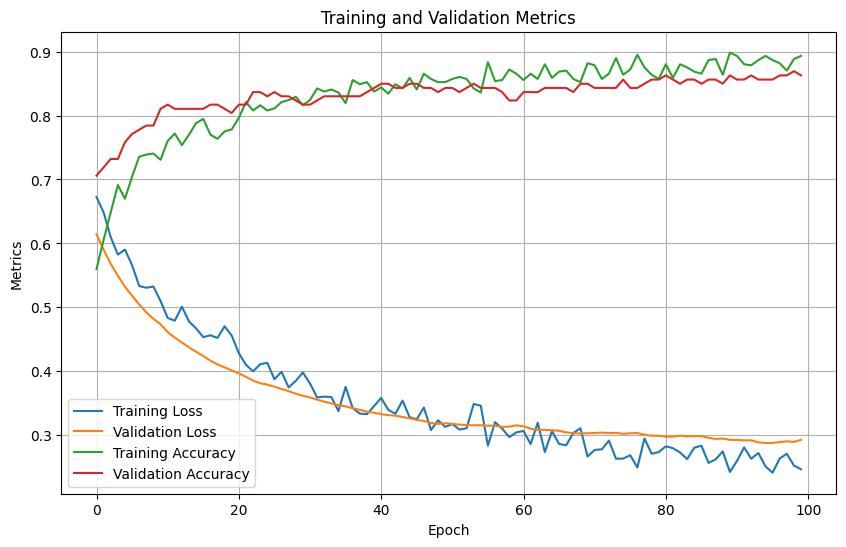

In [122]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       126
         1.0       0.63      0.58      0.61        65

    accuracy                           0.74       191
   macro avg       0.71      0.71      0.71       191
weighted avg       0.74      0.74      0.74       191



                                                     LSTM

In [125]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, BatchNormalization
from tensorflow.keras.models import Sequential
model2 = Sequential([
    LSTM(units=256, input_shape=(21, 20), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=128, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model2.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100


c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6917 - loss: 0.6220 - val_accuracy: 0.7778 - val_loss: 0.5359
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9245 - loss: 0.1840 - val_accuracy: 0.8170 - val_loss: 0.4158
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9405 - loss: 0.1452 - val_accuracy: 0.8301 - val_loss: 0.3726
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9331 - loss: 0.1724 - val_accuracy: 0.8366 - val_loss: 0.3377
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9616 - loss: 0.1185 - val_accuracy: 0.8235 - val_loss: 0.3373
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9494 - loss: 0.1125 - val_accuracy: 0.8497 - val_loss: 0.3006
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9496 - loss: 0.1331 - val_accuracy: 0.8824 - val_loss: 0.2883
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9815 - loss: 0.0640 - val_accuracy: 0.8824 - val_l

In [126]:
with open("mon_modele_lstm.pkl", "wb") as f:
    pickle.dump(model2, f)

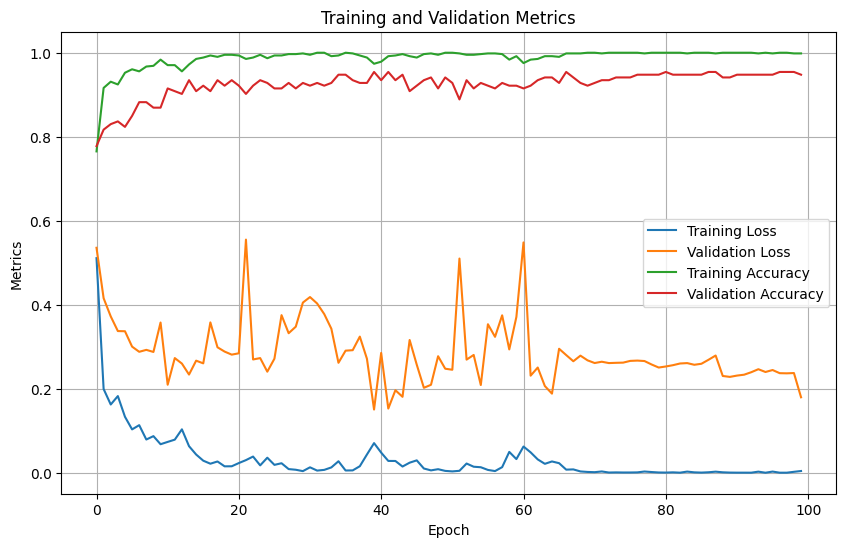

In [127]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
y_pred_proba = model2.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [129]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       126
         1.0       0.98      0.97      0.98        65

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



In [130]:
model2.save('model/lstm.h5')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


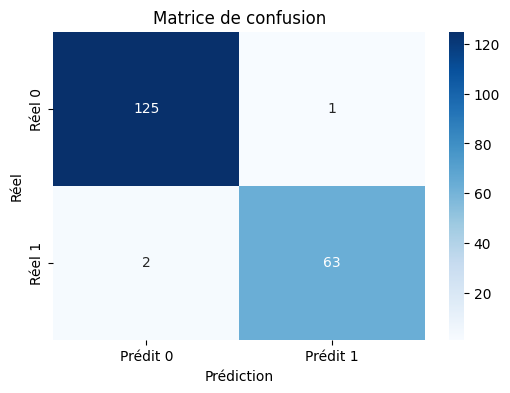

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       126
         1.0       0.98      0.97      0.98        65

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



In [131]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédire les probabilités
y_pred_proba = model2.predict(X_test)

# 2. Convertir en classes (seuil = 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# 3. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 4. Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Prédit 0", "Prédit 1"], yticklabels=["Réel 0", "Réel 1"])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# 5. Rapport de classification
print(classification_report(y_test, y_pred))


In [132]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Ta couche personnalisée (inchangée)
class ScaledActivatedDense(Layer):
    def __init__(self, units, activation='relu', name_prefix="", **kwargs):
        super(ScaledActivatedDense, self).__init__(**kwargs)
        self.units = units
        self.activation_fn = tf.keras.activations.get(activation)
        self.name_prefix = name_prefix

    def build(self, input_shape):
        self.dense = Dense(self.units, activation=None, use_bias=True)
        self.a = self.add_weight(
            name=f"{self.name_prefix}_scales",
            shape=(self.units,),
            initializer="ones",
            trainable=True
        )

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.activation_fn(x)
        return self.a * x


In [133]:

timesteps = 21
features_per_step = 20
input_layer = Input(shape=(timesteps, features_per_step), name="input")

# Étape 1 : réduire par moyenne globale les 3 pas de temps
x = GlobalAveragePooling1D()(input_layer)  # devient (batch_size, features_per_step)

# Étape 2 : MLP profond
x = BatchNormalization()(x)
x = ScaledActivatedDense(256, activation='relu', name_prefix="dense1")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = ScaledActivatedDense(128, activation='relu', name_prefix="dense2")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = ScaledActivatedDense(16, activation='relu', name_prefix="dense3")(x)

output = Dense(1, activation='sigmoid', name="output")(x)

# Création du modèle
model3 = Model(inputs=input_layer, outputs=output)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()   

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 21, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 20)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_4        │ (None, 256)            │         5,632 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_5        │ (None, 128)            │        33,024 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_6        │ (None, 16)             │         2,080 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,369 (165.50 KB)

 Trainable params: 41,561 (162.35 KB)

 Non-trainable params: 808 (3.16 KB)

In [134]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model3.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6244 - loss: 0.6807 - val_accuracy: 0.7386 - val_loss: 0.5549
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8265 - loss: 0.3981 - val_accuracy: 0.7647 - val_loss: 0.5008
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8192 - loss: 0.3727 - val_accuracy: 0.7974 - val_loss: 0.4605
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8767 - loss: 0.3008 - val_accuracy: 0.8105 - val_loss: 0.4224
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8727 - loss: 0.3184 - val_accuracy: 0.8366 - val_loss: 0.3924
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8667 - loss: 0.2942 - val_accuracy: 0.8366 - val_loss: 0.3673
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8677 - loss: 0.2808 - val_accuracy: 0.8431 - val_loss: 0.3397
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8840 - loss: 0.2475 - val_accuracy: 0.8301 - 

In [135]:
y_pred_proba = model3.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [136]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       126
         1.0       0.88      0.89      0.89        65

    accuracy                           0.92       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.92      0.92      0.92       191



In [137]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, BatchNormalization
from tensorflow.keras.models import Sequential
model4 = Sequential([
    LSTM(units=64, input_shape=(21, 20), return_sequences=True),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=32, return_sequences=False),
    Dropout(0.4),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model4.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100


c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6710 - loss: 0.6871 - val_accuracy: 0.6993 - val_loss: 0.5851
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8019 - loss: 0.4401 - val_accuracy: 0.7647 - val_loss: 0.5140
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8890 - loss: 0.2762 - val_accuracy: 0.7712 - val_loss: 0.4604
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9037 - loss: 0.2511 - val_accuracy: 0.8039 - val_loss: 0.4042
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9322 - loss: 0.1938 - val_accuracy: 0.8366 - val_loss: 0.3502
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9224 - loss: 0.2091 - val_accuracy: 0.8627 - val_loss: 0.3604
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9341 - loss: 0.1645 - val_accuracy: 0.8889 - val_loss: 0.3126
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9451 - loss: 0.1315 - val_accuracy: 0.8627 - val_l

In [138]:
y_pred_proba = model4.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       126
         1.0       0.98      0.97      0.98        65

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



In [ ]:
def prediction(mission, point=42):

    scaler = StandardScaler()
    mission_std = scaler.fit_transform(mission)
    mission_std = pd.DataFrame(mission_std, columns=mission.columns)

    # data = mission
    data = mission_std
    # data = mission

    sequence_length = 21
    sequences = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data.iloc[i:i + sequence_length].values
        if sequence.shape == (sequence_length, data.shape[1]):
             sequences.append(sequence)


    X = np.array(sequences)

    print(X.shape)
    
    sart_time = time.time()
    result = model3.predict(X)
    end_time = time.time()
    print("Prediction result: ", (result[0:point] > 0.5).astype(int))
    # print("Prediction result: ", result)
    print("prediction time : ",end_time-sart_time)

NameError: name 'data' is not defined

In [160]:
mission=pd.read_csv('data_1.csv')

In [161]:
mission.head()
mission=mission.drop(columns=['target_x','target_y','target_z','snow','erreur_m'])
mission=mission.drop(columns=['erreur_cumulee_m'])

In [162]:
mission.head()

,mission_id,time,real_x,real_y,real_z,vx,vy,vz,ax,ay,az,roll,pitch,yaw,wind_x,wind_y,wind_z,velocity,rain,fog
0,1,1.747763e+09,-5.322849,20.121300,-4.681305,0.146957,0.058428,-0.930728,-0.126290,-0.045302,-8.001704,-0.011934,0.063409,3.079759,3.288905,1.923892,0.483105,7.75,0.1,0.161
1,1,1.747763e+09,-3.415282,19.262053,-5.010147,1.308672,-0.613782,0.126232,-0.000650,-0.063845,-10.255594,-0.153151,0.002546,3.046363,3.262221,1.901310,0.483924,7.75,0.1,0.161
2,1,1.747763e+09,-1.300347,18.288923,-4.831299,1.228576,-0.608501,-0.134659,-0.020005,-0.065327,-10.035391,-0.168105,0.006722,3.047047,2.739674,1.764661,0.585473,7.75,0.1,0.161
3,1,1.747763e+09,0.678866,17.358110,-4.903763,1.034096,-0.600811,-0.126933,-0.034339,-0.075271,-9.802279,-0.156063,0.013958,3.044710,2.750039,1.717058,0.578005,7.75,0.1,0.161
4,1,1.747763e+09,2.601047,16.288015,-4.986862,1.022423,-0.582005,-0.028273,-0.026774,-0.081873,-9.736919,-0.138653,0.001740,3.044778,3.074431,1.838480,0.544886,7.75,0.1,0.161


In [163]:
prediction(mission,42)

pass


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (42,) + inhomogeneous part.

In [ ]:
mission['real_y']

0     20.121300
1     19.262053
2     18.288923
3     17.358110
4     16.288015
5     15.234784
6     14.294890
7     13.276971
8     12.248839
9     11.177021
10    10.264859
11     9.274789
12     8.222674
13     7.214355
14     6.260663
15     5.246694
16     4.222646
17     3.233322
18     2.242628
19     1.216166
20     0.211078
21    -0.770913
22    -1.783407
23    -2.776212
24    -3.782765
25    -4.773824
26    -5.788563
27    -6.778453
28    -7.773386
29    -8.784881
30    -9.785323
31   -10.782451
32   -11.793631
33   -12.778482
34   -13.780486
35   -14.790394
36   -15.784764
37   -16.782499
38   -17.777330
39   -19.093330
40   -19.093330
41   -19.093330
Name: real_y, dtype: float64